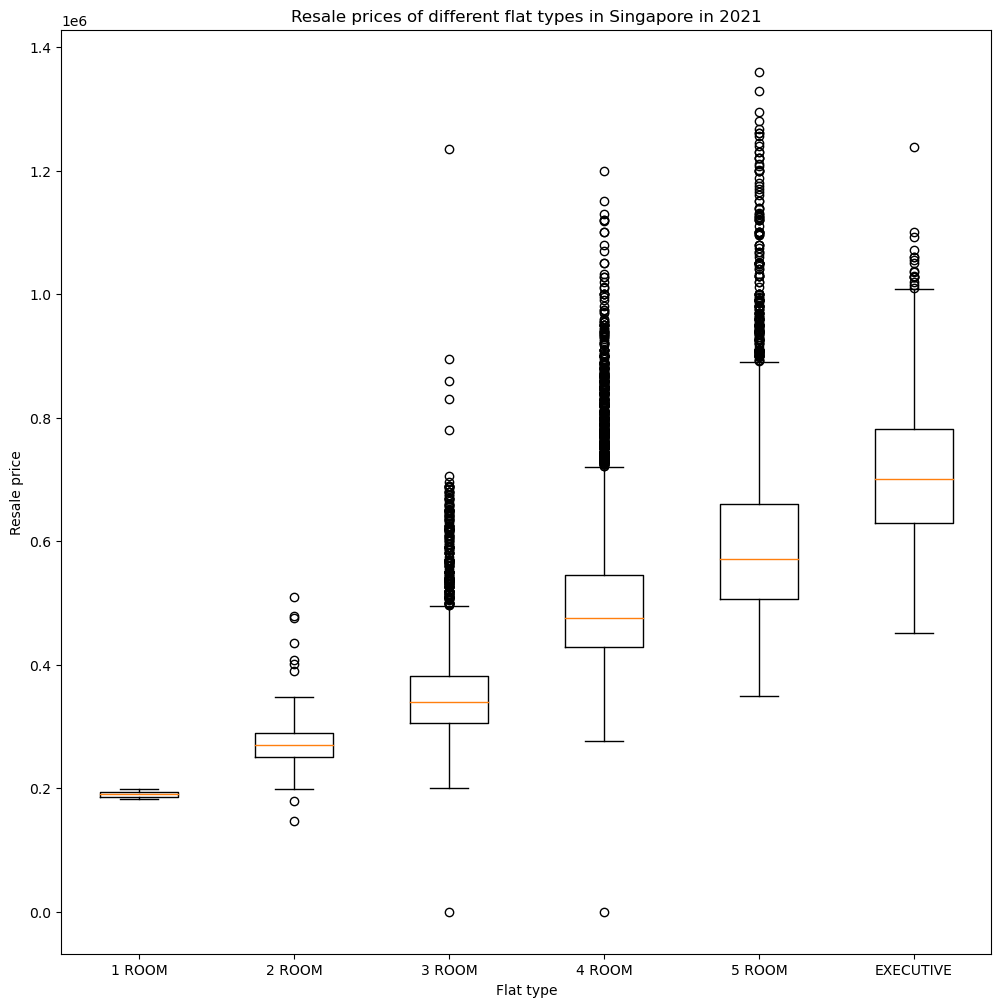

In [30]:
#graph 1.1 - boxplot

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(12, 12))
plt.style.use('default')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('month','U50'), ('town','U50'), ('flat_type','U50'), ('block','i8'), ('street_name','U50'), ('storey_range','U50'), ('floor_area_sqm','i8'), ('flat_model','U50'), ('lease_commence_date','U50'), ('remaining_lease','U50'), ('resale_price','i8')], skip_header = 1)

#listing array for months in 2021, and various flat types available
x2021 = data['month'][-12:]
data_2021 = data[np.isin(data['month'], x2021)]
categories = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']

#1 room data
labels1 = data_2021[data_2021['flat_type'] == categories[0]]
values1 = labels1['resale_price']

#2 room data
labels2 = data_2021[data_2021['flat_type'] == categories[1]]
values2 = labels2['resale_price']

#3 room data
labels3 = data_2021[data_2021['flat_type'] == categories[2]]
values3 = labels3['resale_price']

#4 room data
labels4 = data_2021[data_2021['flat_type'] == categories[3]]
values4 = labels4['resale_price']

#5 room data
labels5 = data_2021[data_2021['flat_type'] == categories[4]]
values5 = labels5['resale_price']

#Executive data
labels6 = data_2021[data_2021['flat_type'] == categories[5]]
values6 = labels6['resale_price']

#combining all values together
values = [values1,values2,values3,values4,values5,values6]

#plotting the graph and labels
plt.title('Resale prices of different flat types in Singapore in 2021')
plt.boxplot(values, labels=categories)
plt.xlabel('Flat type')
plt.ylabel('Resale price')

plt.show()



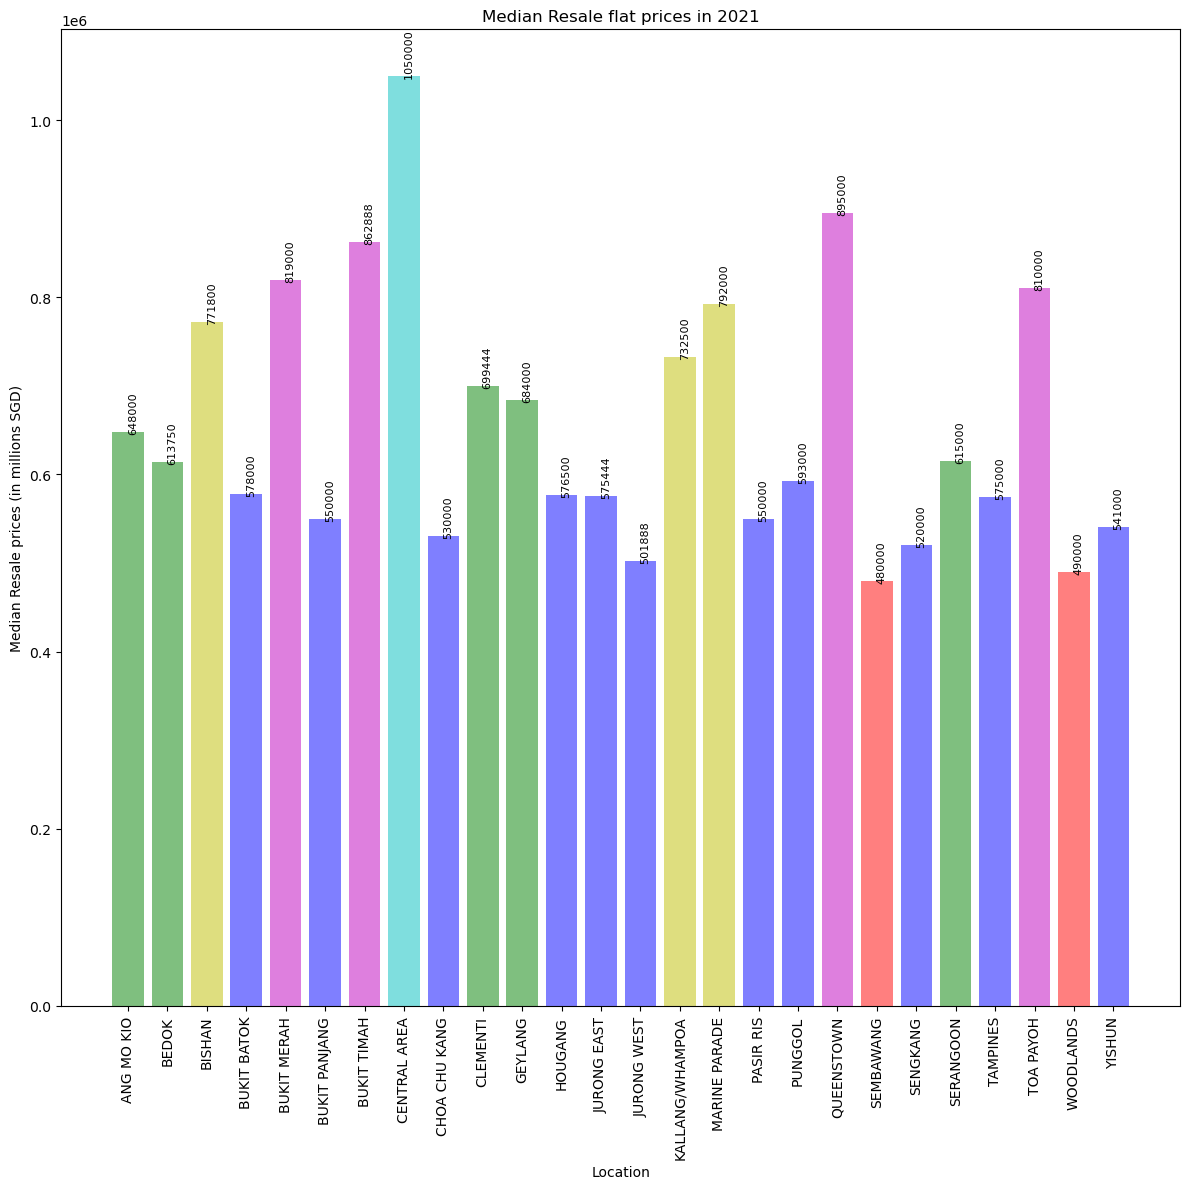

In [31]:
#graph 1.2 - bar chart

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(12, 12))
plt.style.use('default')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('month','U50'), ('town','U50'), ('flat_type','U50'), ('block','i8'), ('street_name','U50'), ('storey_range','U50'), ('floor_area_sqm','i8'), ('flat_model','U50'), ('lease_commence_date','U50'), ('remaining_lease','U50'), ('resale_price','i8')], skip_header = 1)

#filter data to show only 2021 values
x2021 = np.array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11'])
data_2021 = data[np.isin(data['month'], x2021)]

#filter data to show only 5 room flat prices
data_5room = data_2021[np.isin(data_2021['flat_type'], '5 ROOM')]

#identifying all towns available in the data
location = np.unique(data_5room['town'])

#values of the flats in median prices
medianprices = []
for i in location:
    total = np.median(data_5room['resale_price'][np.isin(data_5room['town'], i)])
    medianprices.append(total)

#assigning data to numpy array and changing data type to integer
medianprices_np= np.array(medianprices).astype(int)

#adding value labels
for index,data in enumerate(medianprices_np):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=8), rotation = 90)

#categorising color of the bars based on values of the data
colors = []
for i in medianprices_np:
    if i < 500000:
        a = 'r'
        colors.append(a)
    
    elif i <600000:
        b = 'b'
        colors.append(b)
        
    elif i < 700000:
        c = 'g'
        colors.append(c)
        
    elif i < 800000:
        c = 'y'
        colors.append(c)
        
    elif i < 900000:
        d = 'm'
        colors.append(d)
        
    else:
        e = 'c'
        colors.append(e)
        
#plotting the barchart
plt.bar(location, medianprices, alpha=0.5, color = colors)
plt.title('Median Resale flat prices in 2021')
plt.xlabel('Location')
plt.ylabel('Median Resale prices (in millions SGD)')
plt.xticks(rotation=90)

plt.tight_layout()


plt.show()


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


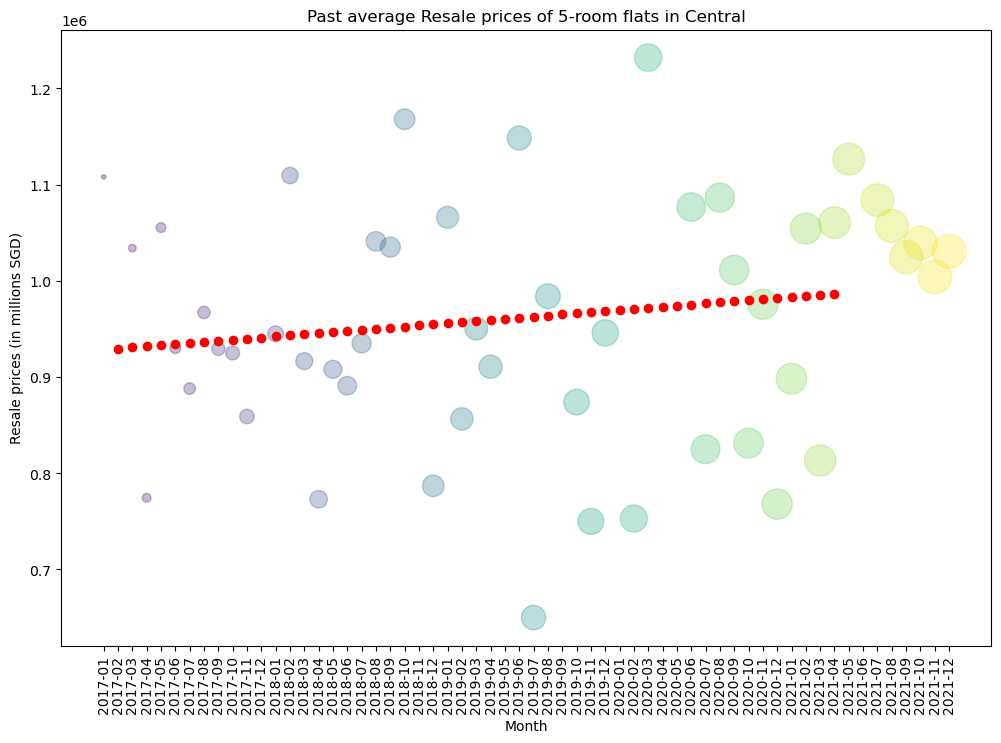

In [32]:
#graph 1.3 - scatterplot

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(12, 8))
plt.style.use('default')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('month','U50'), ('town','U50'), ('flat_type','U50'), ('block','i8'), ('street_name','U50'), ('storey_range','U50'), ('floor_area_sqm','i8'), ('flat_model','U50'), ('lease_commence_date','U50'), ('remaining_lease','U50'), ('resale_price','i8')], skip_header = 1)

#retrieving dates from dataset
dates = np.unique(data['month'])

#filtering data to show only Central area & 4 room flat
data_C = data[np.isin(data['town'], 'CENTRAL AREA')]
data_C_5room = data_C[np.isin(data_C['flat_type'], '5 ROOM')]

#deriving mean prices of 4 room flats in Central area
meanprices = []
for i in dates:
    total = np.mean(data_C_5room['resale_price'][np.isin(data_C_5room['month'], i)])
    meanprices.append(total)

#changing data values to array and removing nan values
y=np.array(meanprices)
y = y[~np.isnan(y)]
x=np.arange(1,len(y)+1)

#plotting scatterplot & labeling of axes
colors = np.arange(1,61)
sizes = 10* np.arange(1,61)

plt.title('Past average Resale prices of 5-room flats in Central')
plt.ylabel('Resale prices (in millions SGD)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.scatter(dates, meanprices , c=colors, s=sizes, alpha =0.3, cmap='viridis')

#find best fit line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, 'ro')


plt.show()

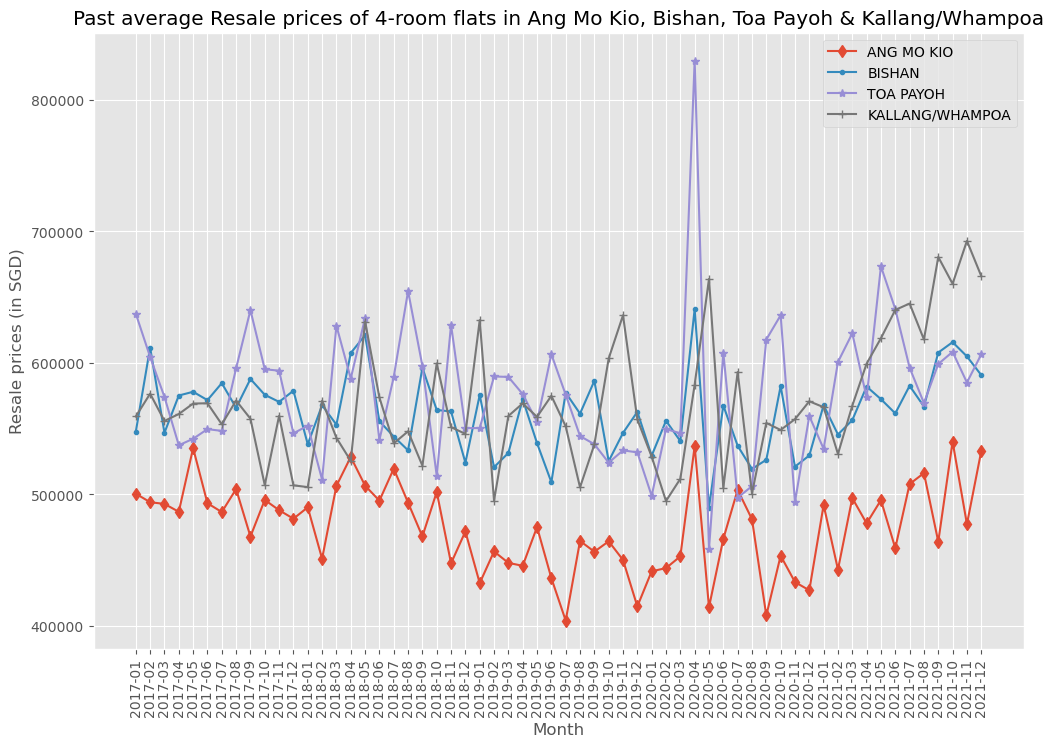

In [36]:
#graph 1.4 - lineplot

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('month','U50'), ('town','U50'), ('flat_type','U50'), ('block','i8'), ('street_name','U50'), ('storey_range','U50'), ('floor_area_sqm','i8'), ('flat_model','U50'), ('lease_commence_date','U50'), ('remaining_lease','U50'), ('resale_price','i8')], skip_header = 1)

#retrieving dates from dataset
dates = np.unique(data['month'])

#filtering data to show only Ang Mo Kio area & 4 room flat
data_AMK = data[np.isin(data['town'], 'ANG MO KIO')]
data_AMK_4room = data_AMK[np.isin(data_AMK['flat_type'], '4 ROOM')]

#deriving mean prices of 4 room flats in Ang Mo Kio area
meanprices_AMK = []
for i in dates:
    total = np.mean(data_AMK_4room['resale_price'][np.isin(data_AMK_4room['month'], i)])
    meanprices_AMK.append(total)
    
#filtering data to show only Bishan area & 4 room flat
data_BISHAN = data[np.isin(data['town'], 'BISHAN')]
data_BISHAN_4room = data_BISHAN[np.isin(data_BISHAN['flat_type'], '4 ROOM')]

#deriving mean prices of 4 room flats in Bishan area
meanprices_BISHAN = []
for i in dates:
    total = np.mean(data_BISHAN_4room['resale_price'][np.isin(data_BISHAN_4room['month'], i)])
    meanprices_BISHAN.append(total)

#filtering data to show only Toa Payoh area & 4 room flat
data_TPY = data[np.isin(data['town'], 'TOA PAYOH')]
data_TPY_4room = data_TPY[np.isin(data_TPY['flat_type'], '4 ROOM')]

#deriving mean prices of 4 room flats in Toa Payoh area
meanprices_TPY = []
for i in dates:
    total = np.mean(data_TPY_4room['resale_price'][np.isin(data_TPY_4room['month'], i)])
    meanprices_TPY.append(total)

#filtering data to show only Kallang/Whampoa area & 4 room flat
data_KW = data[np.isin(data['town'], 'KALLANG/WHAMPOA')]
data_KW_4room = data_KW[np.isin(data_KW['flat_type'], '4 ROOM')]

#deriving mean prices of 4 room flats in Kallang/Whampoa area
meanprices_KW = []
for i in dates:
    total = np.mean(data_KW_4room['resale_price'][np.isin(data_KW_4room['month'], i)])
    meanprices_KW.append(total)
    
#plotting lineplot & labeling of axes
plt.title('Past average Resale prices of 4-room flats in Ang Mo Kio, Bishan, Toa Payoh & Kallang/Whampoa')
plt.ylabel('Resale prices (in SGD)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.plot(dates,meanprices_AMK, marker='d', label = 'ANG MO KIO')
plt.plot(dates,meanprices_BISHAN, marker='.', label = 'BISHAN')
plt.plot(dates,meanprices_TPY, marker='*', label = 'TOA PAYOH')
plt.plot(dates,meanprices_KW, marker='+', label = 'KALLANG/WHAMPOA')
plt.legend()

plt.show()


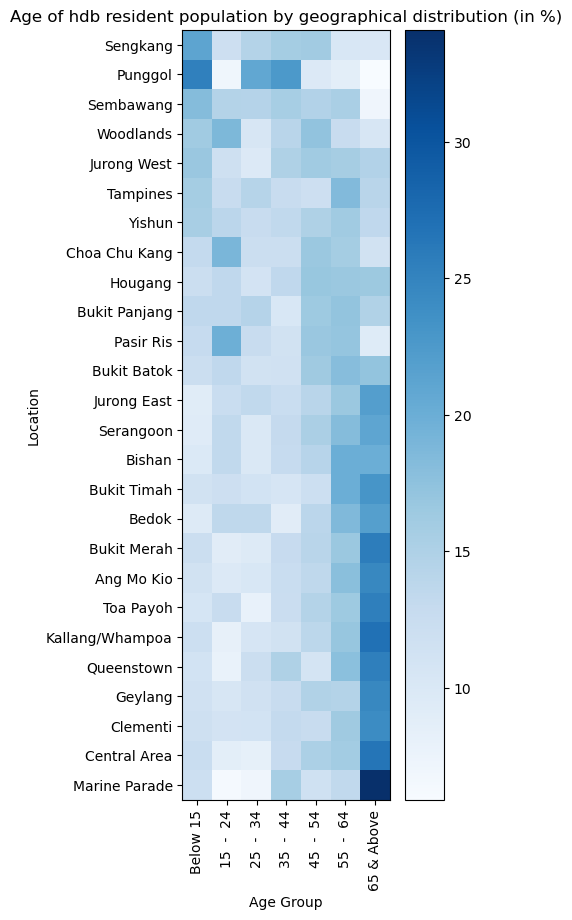

In [34]:
#graph 2 - heatmap

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(4, 10))
plt.style.use('default')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/age-of-hdb-resident-population-by-geographical-distribution.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('shs_year','i8'), ('town_estate','U50'), ('age_group','U50'), ('percentage','float64')], skip_header = 1)

#extracting only 2018 data
data_2018 = data[np.isin(data['shs_year'], 2018)]
                                                 
age_group = np.array(['Below 15', '15  -  24', '25  -  34', '35  -  44', '45  -  54', '55  -  64', '65 & Above'])
location = np.array(['Sengkang', 'Punggol', 'Sembawang', 'Woodlands', 'Jurong West', 'Tampines', 'Yishun', 'Choa Chu Kang', 'Hougang', 'Bukit Panjang', 'Pasir Ris', 'Bukit Batok', 'Jurong East', 'Serangoon', 'Bishan', 'Bukit Timah', 'Bedok', 'Bukit Merah', 'Ang Mo Kio', 'Toa Payoh', 'Kallang/Whampoa', 'Queenstown', 'Geylang', 'Clementi', 'Central Area', 'Marine Parade'])

#extracting the percentages and reshaping the numpy array
new_array = data_2018['percentage']
new_array2 = new_array.reshape(26,7)

#plotting the graph and titles
plt.imshow(new_array2, cmap='Blues',interpolation="nearest")
plt.xticks(np.arange(7),age_group, rotation = 90)
plt.yticks(np.arange(26),location)
plt.title('Age of hdb resident population by geographical distribution (in %)')
plt.xlabel('Age Group')
plt.ylabel('Location')

plt.colorbar() #show color scale

plt.show()


<Figure size 1200x1200 with 0 Axes>

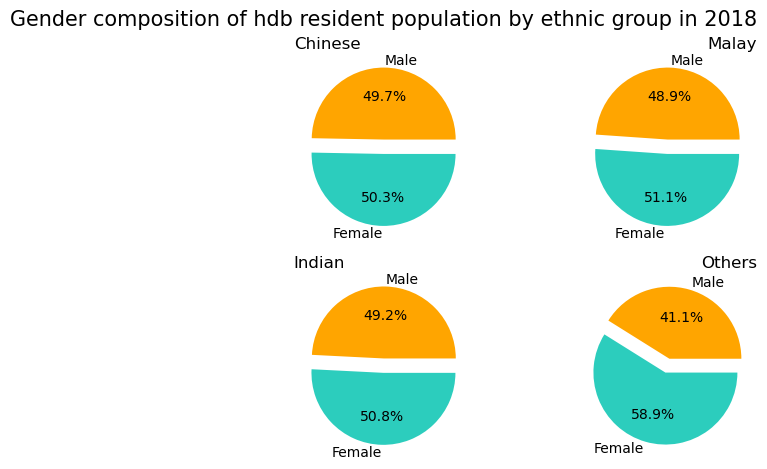

In [37]:
#graph 3 - pie chart

#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#setting dimensions and style of chart
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(2, 2)
plt.style.use('default')

# Importing csv file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/gender-composition-of-hdb-resident-population-by-ethnic-group.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('shs_year','i8'), ('ethnic_group','U50'), ('gender','U50'), ('percentage','float64')], skip_header = 1)

# Extract rows containing 2018 only
data_2018 = data[data['shs_year']==2018]

# Grouping into array based on ethnic group
data_ethnic = np.array(['Chinese', 'Malay', 'Indian', 'Others'])

Chinese = data_2018[np.isin(data_2018['ethnic_group'], data_ethnic[0])]
Malay = data_2018[np.isin(data_2018['ethnic_group'], data_ethnic[1])]
Indian = data_2018[np.isin(data_2018['ethnic_group'], data_ethnic[2])]
Others = data_2018[np.isin(data_2018['ethnic_group'], data_ethnic[3])]

#setting colors of the pie charts
colors = ['#FFA500', '#2CCDBD']
explode = (0.1, 0.1)

#adding labels and titles for the pie charts
ax[0,0].set_title('Gender composition of hdb resident population by ethnic group in 2018\n', loc = 'center', fontsize=15)
ax[0,0].pie(Malay['percentage'], labels=Malay['gender'],colors=colors, autopct='%1.1f%%', explode = explode)
ax[0,0].set_title('Chinese', loc='left')
ax[0,1].pie(Chinese['percentage'], labels=Chinese['gender'], colors=colors, autopct='%1.1f%%', explode = explode)
ax[0,1].set_title('Malay', loc='right')
ax[1,0].pie(Indian['percentage'], labels=Indian['gender'], colors=colors, autopct='%1.1f%%', explode = explode)
ax[1,0].set_title('Indian', loc='left')
ax[1,1].pie(Others['percentage'], labels=Others['gender'], colors=colors, autopct='%1.1f%%', explode = explode)
ax[1,1].set_title('Others', loc='right')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

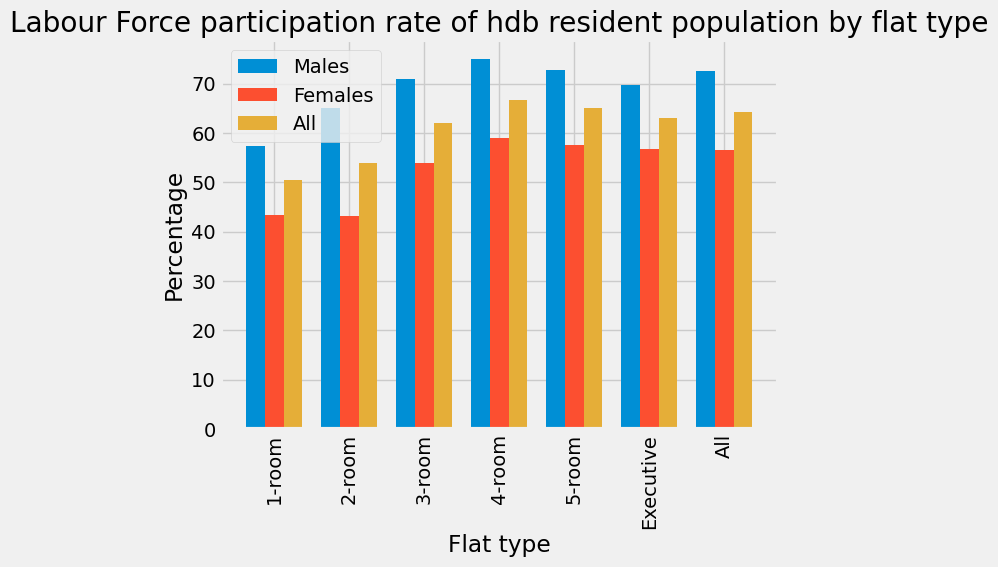

In [38]:
#graph 4 - bar chart

#importing libraries
import matplotlib.pyplot as plt
import numpy as np

#setting dimensions and style of chart
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')

#importing and reading file
file = "/Users/Yimin/Documents/SP/Introduction to Programming for Data Science/CA1/Junie Tan-p7053148-Zheng Yimin/Datasets used/labour-force-participation-rate-of-hdb-resident-population-by-flat-type.csv"
data = np.genfromtxt(file, delimiter=',', dtype=[('shs_year','U50'), ('flat_type','U50'), ('gender','U50'), ('lfpr','float64')], skip_header = 1)

#filtering data to show only year 2018 values
data_2018 = data[np.isin(data['shs_year'], '2018')]

#categorising the labels & segregating data based on gender
labels = ['1-room', '2-room', '3-room', '4-room', '5-room', 'Executive', 'All']
men = data_2018[np.isin(data_2018['gender'], 'Male')]
women = data_2018[np.isin(data_2018['gender'], 'Female')]
total = data_2018[np.isin(data_2018['gender'], 'All')]

#plotting bar graph
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

#setting the distances between the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, men['lfpr'], width, label='Males')
rects2 = ax.bar(x , women['lfpr'], width, label='Females')
rects3 = ax.bar(x + width, total['lfpr'], width, label='All')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_xlabel('Flat type')
ax.set_title('Labour Force participation rate of hdb resident population by flat type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90)

ax.legend()


plt.show()
